## Практическое задание по теме «Проверка гипотез»

# Формируем выборки

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# Обновление кода, использующего seaborn.distplot для новой функции histplot (на замену distplot)
sns.set_theme()
df = sns.load_dataset("penguins") 

In [3]:
# Создаем датафрейм из исходного файла
df = pd.read_excel('/content/drive/MyDrive/Нетология/Задания и Проекты/Основы статистики/Работа со статистическими гипотезами и основы AB-тестирования/Кондратьев_(FPS-21_Прак._Задание_Проверка гипотез.xlsx')
df.head()

,InvoiceNo,CustomerID,Country,InvoiceDate,Description,TotalPrice
0,537693,12441,France,2010-12-08,WRAP I LOVE LONDON,51.11
1,537693,12441,France,2010-12-08,VINTAGE CARAVAN GIFT WRAP,43.61
2,537693,12441,France,2010-12-08,BLUE SCANDINAVIAN PAISLEY WRAP,73.08
3,537693,12441,France,2010-12-08,PAPER CHAIN KIT VINTAGE CHRISTMAS,39.17
4,537693,12441,France,2010-12-08,PAPER CHAIN KIT 50'S CHRISTMAS,57.48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    1200 non-null   object        
 1   CustomerID   1200 non-null   int64         
 2   Country      1200 non-null   object        
 3   InvoiceDate  1200 non-null   datetime64[ns]
 4   Description  1200 non-null   object        
 5   TotalPrice   1200 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 56.4+ KB


In [5]:
# Для того, чтобы увидеть как пишутся страны, Группирую по странам и за одно сравню общую сумму продаж
df.groupby('Country').agg({'TotalPrice': ['sum']}) 

,TotalPrice
,sum
Country,
France,17676.335
Germany,21585.960
Norway,21505.960


In [6]:
# Формирование выборок
df_1 = df[df['Country'] == 'France'] # Создаем датафрейм с данными по стране 'France' (Франция)
df_2 = df[df['Country'] == 'Germany'] # Создаем датафрейм с данными по стране 'Germany' (Германия)
# Сравниваем датафреймы между собой 
print('Выборкки имеют одинаковую длинну: ', len(df_1) == len(df_2)) # Выводим на печать нужный текст с получившимся результатом сравнения 


Выборкки имеют одинаковую длинну:  True


In [7]:
df_1.info() # Смотрим, для интереса количество строк. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    400 non-null    object        
 1   CustomerID   400 non-null    int64         
 2   Country      400 non-null    object        
 3   InvoiceDate  400 non-null    datetime64[ns]
 4   Description  400 non-null    object        
 5   TotalPrice   400 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 21.9+ KB


In [8]:
df_2.info() # Видим, что Франция и Германия имеет по 400 строк с данными. 
# Заметим, что Норвегия тоже имеет 400 и могла бы участвовать в сравнении. Но в задании только Франция и Германия


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 400 to 799
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    400 non-null    object        
 1   CustomerID   400 non-null    int64         
 2   Country      400 non-null    object        
 3   InvoiceDate  400 non-null    datetime64[ns]
 4   Description  400 non-null    object        
 5   TotalPrice   400 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 21.9+ KB


# Построим графики объёмов продаж по отдельным странам

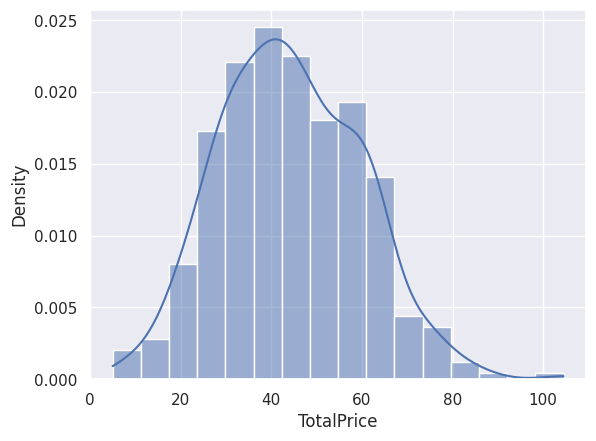

In [9]:
# Строим гистограмму плотности для Франции
# С помощью библиотеки seaborn и функции histplot
sns.histplot(df_1['TotalPrice'], kde=True, stat="density"); # kde=True строит кривую плотности # stat="density" - задаем название по оси Х

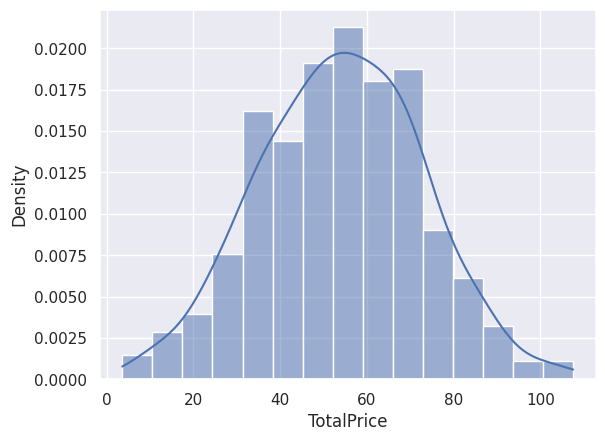

In [10]:
# Строим гистограмму плотности для Германии
sns.histplot(df_2['TotalPrice'], kde=True, stat="density");


In [11]:
# Обе выборки имеют нормальное распределение данных

# Проведём сравнение объёмов продаж Франции и Германии

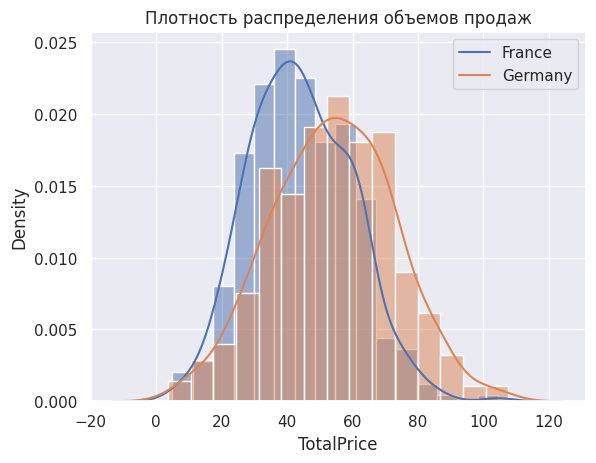

In [12]:
# Строим гистограмму плотности распределения объемов продаж по странам
sns.histplot(df_1['TotalPrice'], kde=True, stat="density", kde_kws=dict(cut=3)) # kde_kws=dict(cut=3) задает плотность гистограммы
sns.histplot(df_2['TotalPrice'], kde=True, stat="density", kde_kws=dict(cut=3))
plt.title('Плотность распределения объемов продаж') # название
plt.legend(['France', 'Germany']) # Цвет
plt.show()

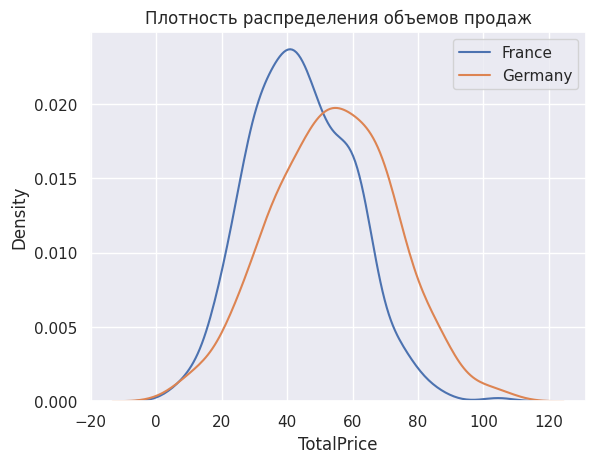

In [13]:
# Сравним объемы продаж по кривой плотности (без гистограммы) с помощью функции kdeplot
sns.kdeplot(df_1['TotalPrice'])
sns.kdeplot(df_2['TotalPrice'])
plt.title('Плотность распределения объемов продаж')
plt.legend(['France', 'Germany']);


In [14]:
# Видим, что объем продаж значимо различается

# Проверим гипотезу: Нулевая гипотеза гласит, что выборки значимо не отличаются.

In [15]:
# Так, как данные имеют нормальное распределение будем проводить Т-Тест (t-критерий Стьюдента)
from scipy.stats import ttest_ind # библиотека scipy.stats и критерий ttest_ind (t-критерий Стьюдента)
alpha = 0.05                      # Уровень значимости

In [16]:
result = ttest_ind(df_1['TotalPrice'], df_2['TotalPrice']) # Создаем переменную result, записываем туда результат выполнения функции ttest
print('p-value: %.8f' % result.pvalue) # Вывести результаты p-value с точностью 8-знаков после запятой

if (result.pvalue < alpha): # Сравниваем p-value с 0,05 с выводим результат if-если else-иначе
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00000000
Отвергаем нулевую гипотезу


# Вывод

In [17]:
# «Объёмы продаж Франции значимо отличаются от объёмов продаж Германии».